In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Generating the random data set for model

In [4]:
X=np.vstack([(np.random.rand(10,2)*5),(np.random.rand(10,2)*10)])
Y=np.hstack([[0]*10,[1]*10])
dataset=pd.DataFrame(X,columns=["X1","X2"])
dataset["Y"]=Y

In [5]:
dataset

,X1,X2,Y
0,3.684646,3.836245,0
1,2.099911,2.019766,0
2,1.654705,0.009798,0
3,3.478078,2.187687,0
4,0.069715,3.489528,0
5,3.868130,4.491539,0
6,3.232559,4.163266,0
7,2.462150,1.565693,0
8,2.283964,3.183258,0
9,2.731703,1.389784,0


## ploting the dataset values

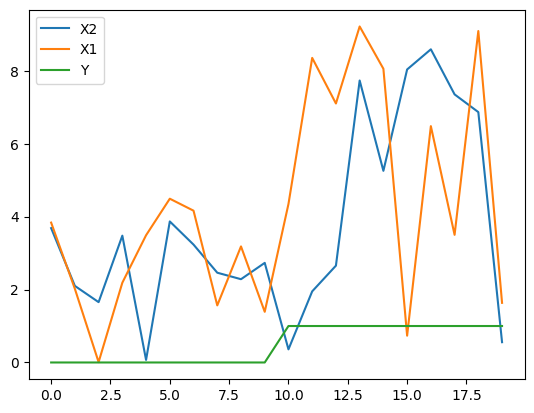

In [7]:
plt.plot(dataset,label='Inline label')
plt.legend(['X2','X1','Y'])

### converting the target variable to vector of number of classes

In [10]:
Z=np.zeros((20,2))
for i in range(20):
    Z[i,Y[i]]=1

In [11]:
X.shape

(20, 2)

### Initiating the random weights and Bias

In [18]:
Wi_1=np.random.rand(3,2)
Bi_1=np.random.rand(3)
Wi_2=np.random.rand(3,2)
Bi_2=np.random.rand(2)


In [19]:
Wi_1,Wi_2

(array([[0.64794951, 0.26401636],
        [0.30347387, 0.62669464],
        [0.75242268, 0.17108933]]),
 array([[0.07667983, 0.84108716],
        [0.63054524, 0.43361057],
        [0.71125461, 0.73600609]]))

In [20]:
Bi_1,Bi_2

(array([0.69316275, 0.72787176, 0.9144776 ]), array([0.60496906, 0.93363277]))

In [21]:
Wi_1.T

array([[0.64794951, 0.30347387, 0.75242268],
       [0.26401636, 0.62669464, 0.17108933]])

In [22]:
X

array([[3.68464593, 3.83624485],
       [2.09991083, 2.01976622],
       [1.65470472, 0.00979811],
       [3.47807835, 2.18768685],
       [0.06971548, 3.48952838],
       [3.86812961, 4.49153916],
       [3.23255872, 4.16326588],
       [2.46215022, 1.56569331],
       [2.28396356, 3.1832583 ],
       [2.73170287, 1.38978354],
       [0.35997579, 4.34663493],
       [1.95050802, 8.35335447],
       [2.65560486, 7.10292781],
       [7.73365722, 9.21517348],
       [5.25610994, 8.05509211],
       [8.03626188, 0.73483223],
       [8.58922886, 6.48149675],
       [7.35262327, 3.50100583],
       [6.86669925, 9.09058844],
       [0.55630451, 1.63532216]])

In [24]:
X.shape

(20, 2)

In [26]:
X.dot(Wi_1.T)

array([[3.40029594, 3.52234785, 3.42875172],
       [1.89388752, 1.90304473, 1.92558098],
       [1.07475198, 0.50830006, 1.24671371],
       [2.8312043 , 2.42651752, 2.99127491],
       [0.96646469, 2.20802557, 0.64947657],
       [3.69219252, 3.98869978, 3.67892286],
       [3.19370515, 3.59009352, 3.14454085],
       [2.00871769, 1.72840986, 2.12045108],
       [2.32032535, 2.68805418, 2.2631275 ],
       [2.13693114, 1.69997034, 2.29317233],
       [1.38082888, 2.83325608, 1.0145168 ],
       [3.46925297, 5.82693072, 2.89677627],
       [3.59598702, 5.25727349, 3.21337246],
       [7.44397599, 8.12206272, 7.39559692],
       [5.53236998, 6.64317509, 5.33295662],
       [5.40109971, 2.89931089, 6.17238766],
       [7.27660784, 6.66852579, 7.57164552],
       [5.68845149, 4.42539061, 6.13126524],
       [6.84933852, 7.78088686, 6.72196292],
       [0.79220904, 1.19367152, 0.6983623 ]])

### Defining the forward propagation function 

In [32]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer-----sigmoid fn
    M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    
    # Second layer---softmax(y-output,M-weight)
    A = M.dot(Wi_2) + Bi_2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    
    return Y, M

In [33]:
forward_prop(X,Wi_1,Bi_1,Wi_2,Bi_2)

(array([[0.28683674, 0.71316326],
        [0.29333112, 0.70666888],
        [0.29917913, 0.70082087],
        [0.28770115, 0.71229885],
        [0.30909166, 0.69090834],
        [0.28639045, 0.71360955],
        [0.28747169, 0.71252831],
        [0.29167686, 0.70832314],
        [0.29103339, 0.70896661],
        [0.2904294 , 0.7095706 ],
        [0.30198967, 0.69801033],
        [0.28722237, 0.71277763],
        [0.28686761, 0.71313239],
        [0.28481804, 0.71518196],
        [0.28506903, 0.71493097],
        [0.28409318, 0.71590682],
        [0.28480729, 0.71519271],
        [0.28481393, 0.71518607],
        [0.28485386, 0.71514614],
        [0.30985487, 0.69014513]]),
 array([[0.98359227, 0.98593942, 0.98717219],
        [0.93002349, 0.932825  , 0.94480252],
        [0.85419815, 0.77489696, 0.89670994],
        [0.97137319, 0.95908132, 0.98027125],
        [0.84018798, 0.94959271, 0.82692002],
        [0.98769484, 0.99113352, 0.98998296],
        [0.9799027 , 0.9868483 , 0.9830271

### Backpropagation by Differentiating the gradient descent

In [39]:
# returns the gradient descent for the weight_2
def diff_Wi_2(H,Z,Y):
    return H.T.dot(Z-Y)

In [40]:
# returns the gradient descent for the weight_2
def diff_Wi_1(X,H,Z,output,Wi_2):
    dZ=(Z-output).dot(Wi_2.T)*H*(1-H)
    return X.T.dot(dZ)


In [43]:
# returns derivative for the both sides
def diff_B2(Z,Y):
    return (Z-Y).sum(axis=0)

def diff_B1(Z,Y,Wi_2,H):
    return ((Z-Y).dot(Wi_2.T)*H*(1-H)).sum(axis=0)

In [47]:
learning_rate=1e-3
for epoch in range(5000):
    output,hidden=forward_prop(X,Wi_1,Bi_1,Wi_2,Bi_2)
    Wi_2+=learning_rate*diff_Wi_2(hidden,Z,output)
    Bi_2+=learning_rate*diff_B2(Z,output)  
    Wi_1+=learning_rate*diff_Wi_1(X,hidden,Z,output,Wi_2).T
    Bi_1+=learning_rate*diff_B1(Z,output,Wi_2,hidden)    
    
    

### Generating prediction at new Datapoint

In [51]:
X_test=np.array([5,5])

hidden_output=1/(1+np.exp(-X_test.dot(Wi_1.T) -Bi_1))
Outer_layer_output=hidden_output.dot(Wi_2)+Bi_2
expA=np.exp(Outer_layer_output)
Y=expA/expA.sum()

In [61]:
print("prob of class 0>>>>> {} \nprob of class 1>>>>> {}".format(Y[0],Y[1]))

prob of class 0>>>>> 0.3896157585315177 
prob of class 1>>>>> 0.6103842414684822
